# Explore here

Vamos a intentar identificar clientes que tienen una mayor probabilidad de contratar un depósito a largo plazo.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [38]:
df.shape

(41188, 21)

In [39]:
df.isnull().sum().sort_values(ascending = True)

age               0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
nr.employed       0
duration          0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
job               0
day_of_week       0
y                 0
dtype: int64

Como podemos observar, no tenemos valores nulos en nuestro dataset.

In [40]:
if df.duplicated().sum():
    df = df.drop_duplicates()
df.shape
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
df.drop(['default', 'euribor3m', 'nr.employed', 'y'], axis = 1, inplace = True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   housing         41176 non-null  object 
 5   loan            41176 non-null  object 
 6   contact         41176 non-null  object 
 7   month           41176 non-null  object 
 8   day_of_week     41176 non-null  object 
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
dtypes: float64(3), int64(5), object(9)
m

(41176, 17)

Ahora tenemos en nuestro dataset 8 variables numéricas y 9 categóricas, en un total de 17 columnas.

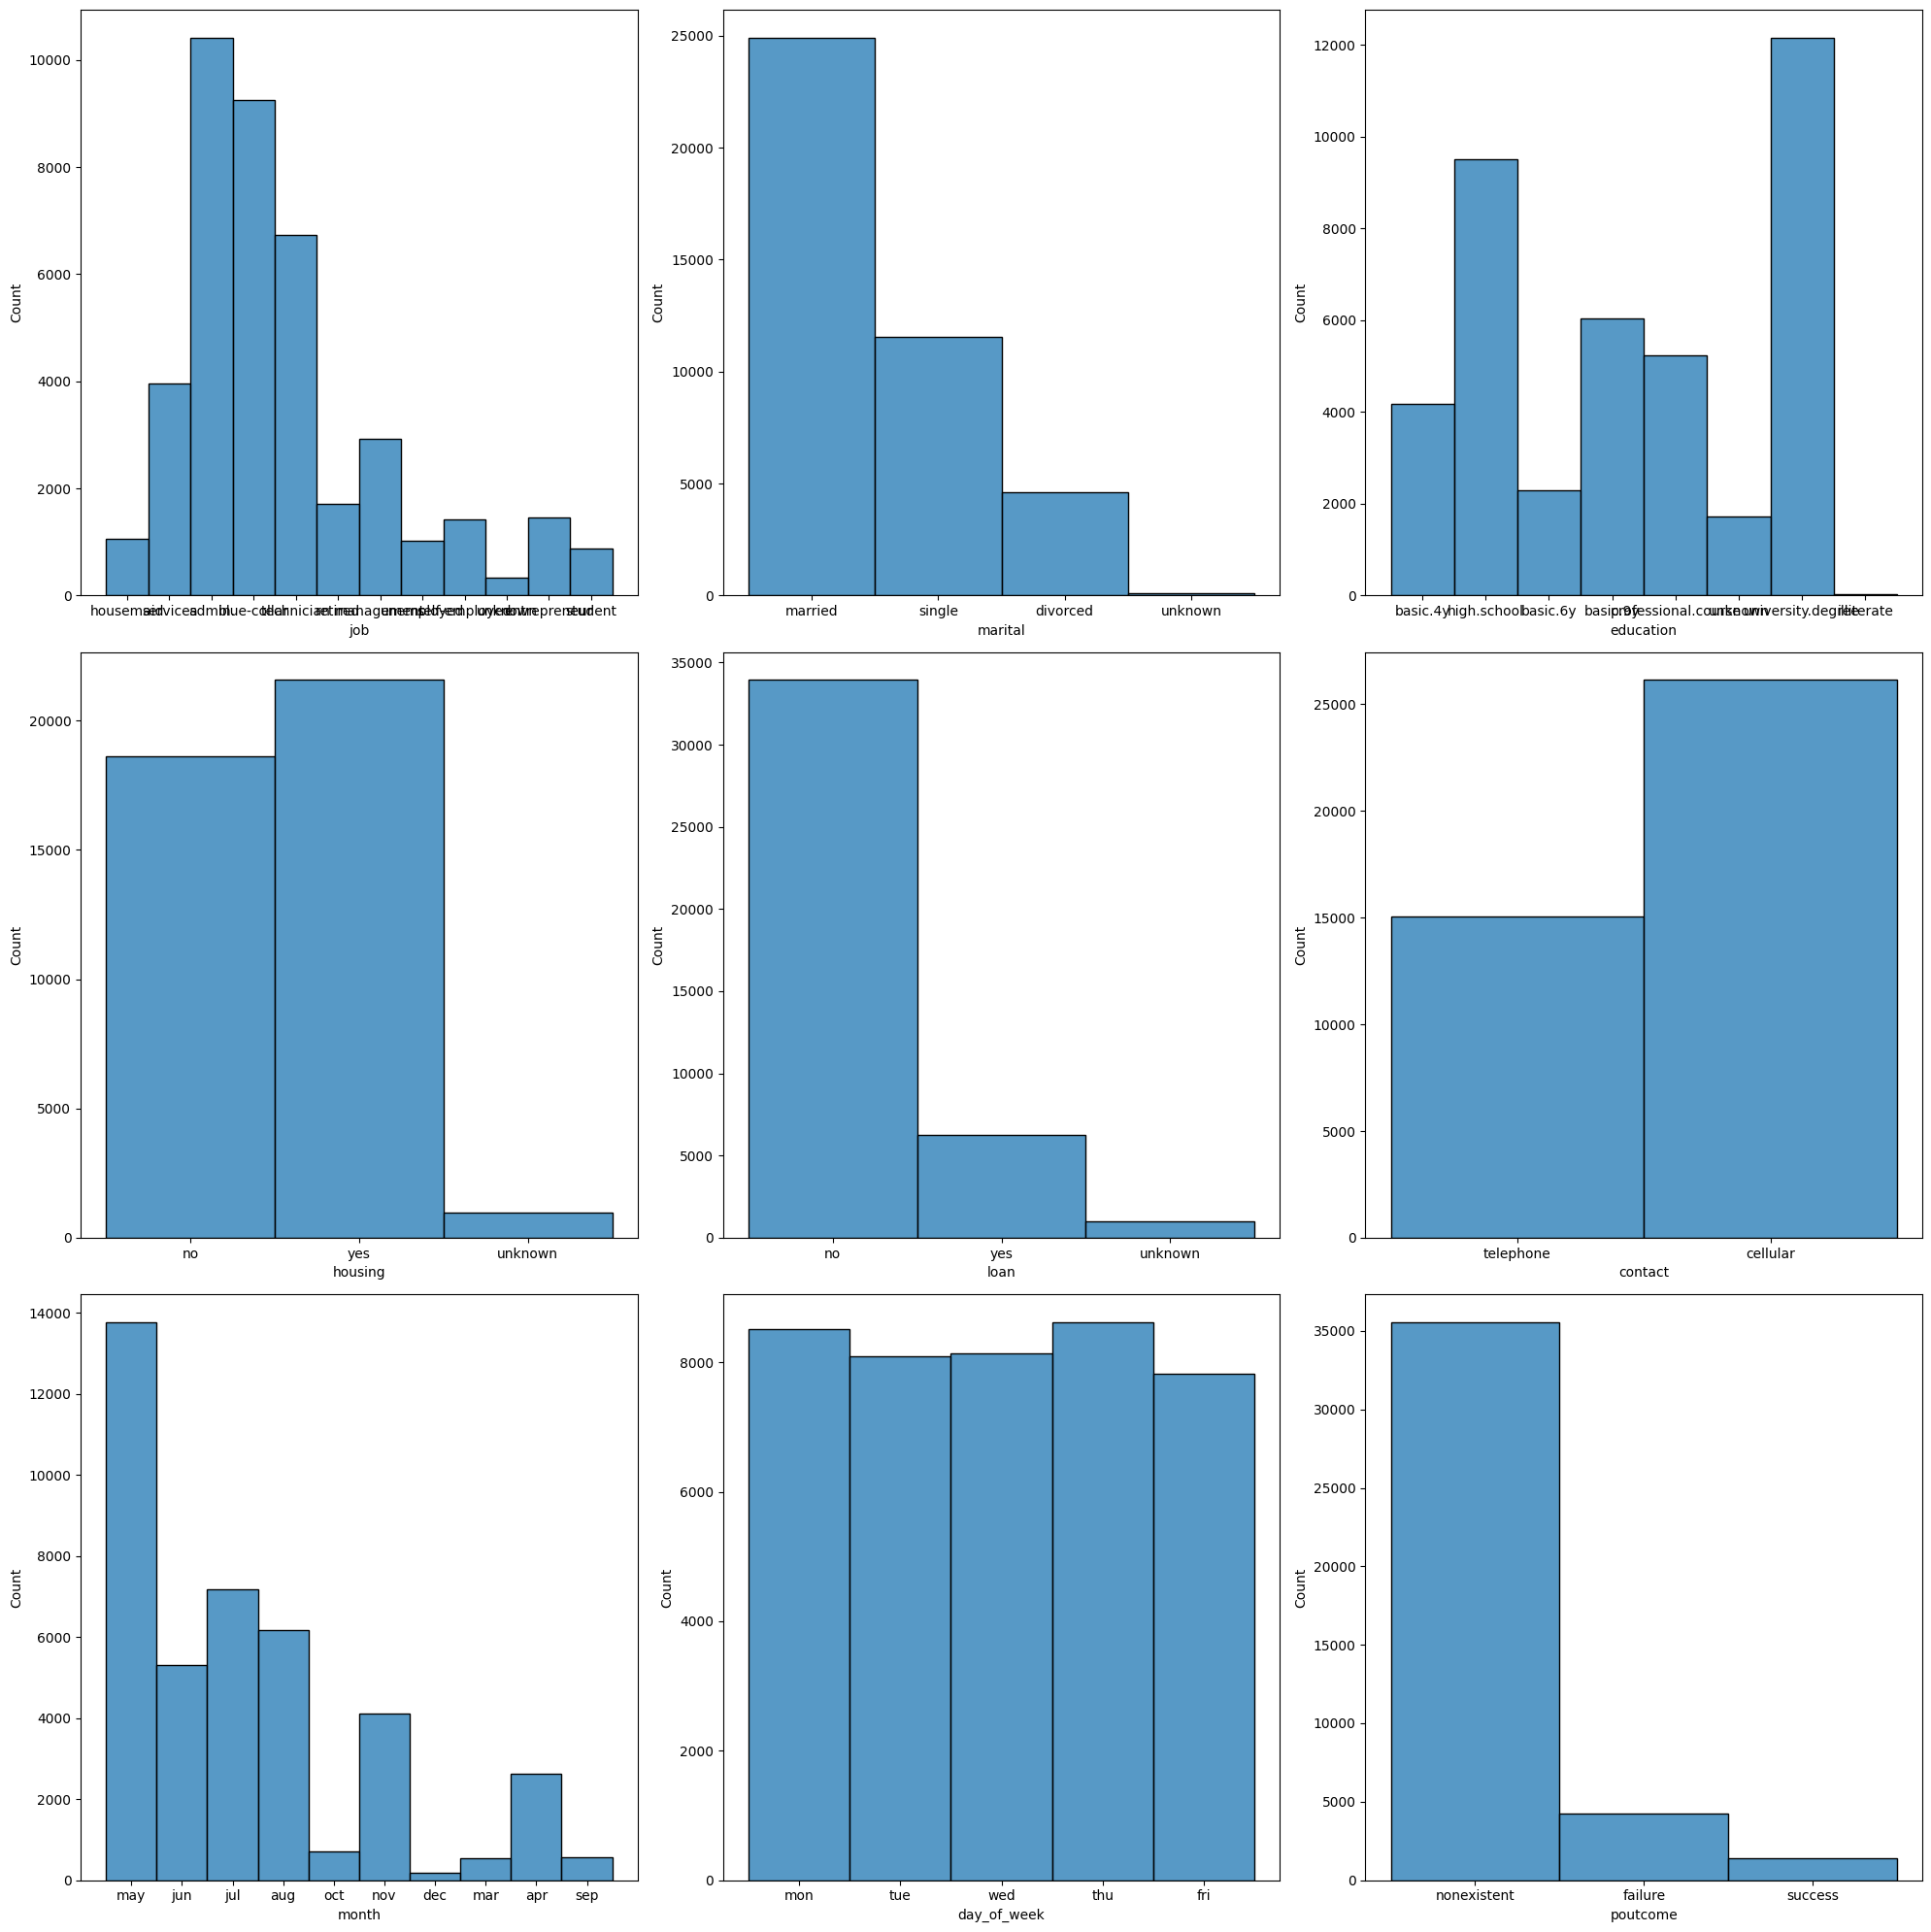

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (20, 20))
sns.histplot(df, x = 'job', ax = axis[0, 0])
sns.histplot(df, x = 'marital', ax = axis[0, 1])
sns.histplot(df, x = 'education', ax = axis[0, 2])
sns.histplot(df, x = 'housing', ax = axis[1, 0])
sns.histplot(df, x = 'loan', ax = axis[1, 1])
sns.histplot(df, x = 'contact', ax = axis[1, 2])
sns.histplot(df, x = 'month', ax = axis[2, 0])
sns.histplot(df, x = 'day_of_week', ax = axis[2, 1])
sns.histplot(df, x = 'poutcome', ax = axis[2, 2])

plt.tight_layout()
plt.show()

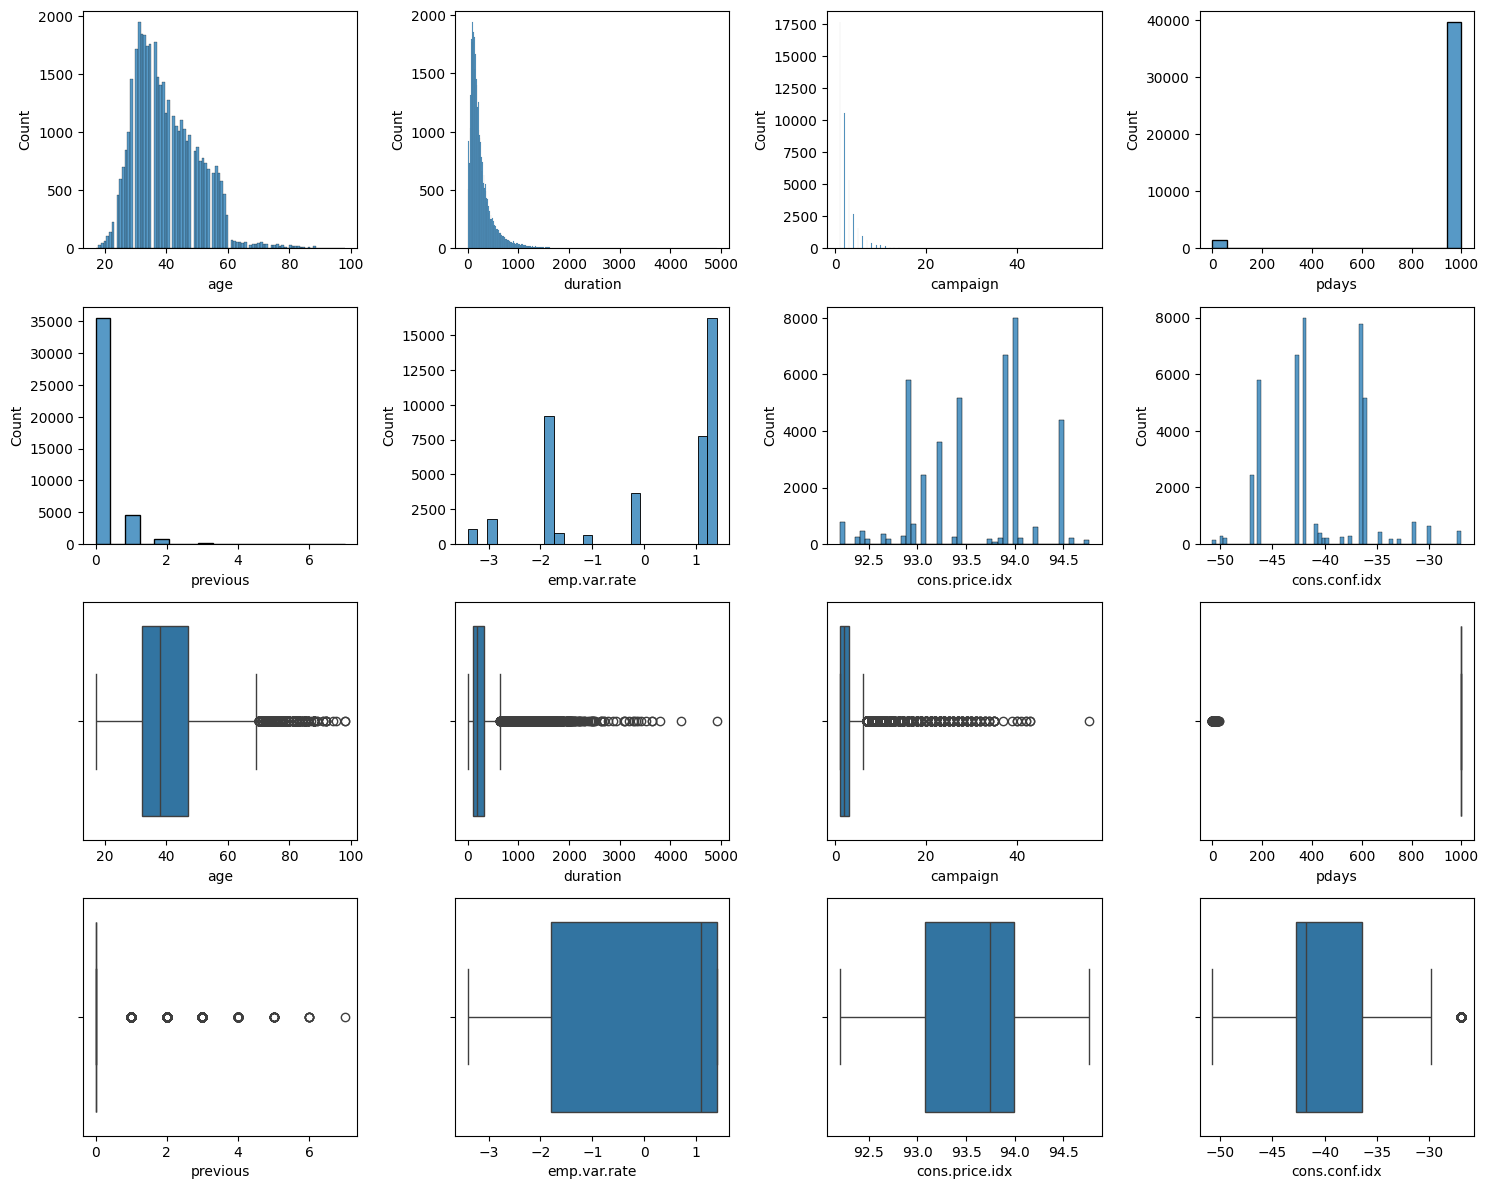

In [73]:

fig, axis = plt.subplots(4, 4, figsize = (15, 12))

sns.histplot(ax = axis[0, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "duration")
sns.histplot(ax = axis[0, 2], data = df, x = "campaign")
sns.histplot(ax = axis[0, 3], data = df, x = "pdays")
sns.histplot(ax = axis[1, 0], data = df, x = "previous")
sns.histplot(ax = axis[1, 1], data = df, x = "emp.var.rate")
sns.histplot(ax = axis[1, 2], data = df, x = "cons.price.idx")
sns.histplot(ax = axis[1, 3], data = df, x = "cons.conf.idx")

sns.boxplot(ax = axis[2, 0], data = df, x = "age")
sns.boxplot(ax = axis[2, 1], data = df, x = "duration")
sns.boxplot(ax = axis[2, 2], data = df, x = "campaign")
sns.boxplot(ax = axis[2, 3], data = df, x = "pdays")
sns.boxplot(ax = axis[3, 0], data = df, x = "previous")
sns.boxplot(ax = axis[3, 1], data = df, x = "emp.var.rate")
sns.boxplot(ax = axis[3, 2], data = df, x = "cons.price.idx")
sns.boxplot(ax = axis[3, 3], data = df, x = "cons.conf.idx")

plt.tight_layout()
plt.show()

Como podemos observar, varias de las variables(age, duration, campaign, previous), presentan valores atipicos(outlayers).